In [1]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("garystafford/environmental-sensor-data-132k")

print("Path to dataset files:", path)

100%|██████████| 6.74M/6.74M [00:00<00:00, 9.10MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/garystafford/environmental-sensor-data-132k/versions/3


In [5]:
import os
os.listdir(path)

['iot_telemetry_data.csv']

In [6]:
import shutil

shutil.copy(f'{path}/iot_telemetry_data.csv', '/content/iot_telemetry_data.csv')


'/content/iot_telemetry_data.csv'

In [7]:
import pandas as pd

df = pd.read_csv('iot_telemetry_data.csv')
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [8]:
#check null values
print(df.isnull().sum())
print(df.shape)
print(df.describe())
print(df.info())

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64
(405184, 9)
                 ts             co       humidity            lpg  \
count  4.051840e+05  405184.000000  405184.000000  405184.000000   
mean   1.594858e+09       0.004639      60.511694       0.007237   
std    1.994984e+05       0.001250      11.366489       0.001444   
min    1.594512e+09       0.001171       1.100000       0.002693   
25%    1.594686e+09       0.003919      51.000000       0.006456   
50%    1.594858e+09       0.004812      54.900000       0.007489   
75%    1.595031e+09       0.005409      74.300003       0.008150   
max    1.595203e+09       0.014420      99.900002       0.016567   

               smoke           temp  
count  405184.000000  405184.000000  
mean        0.019264      22.453987  
std         0.004086       2.698347  
min         0.006692       0.000000  
25%         0.017024      19.900000  
50%     

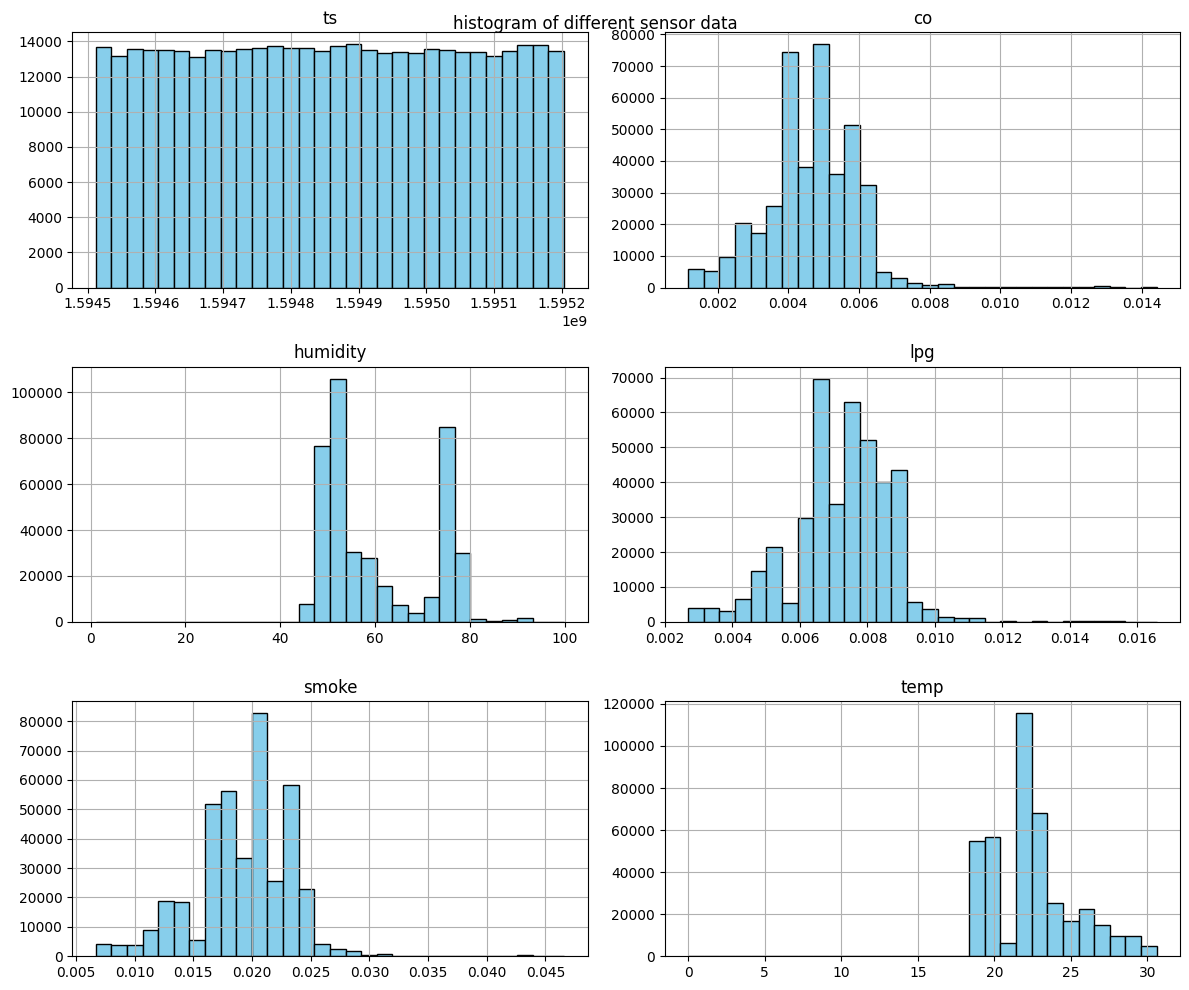

In [9]:
#histogram
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64']).columns

df[numeric_cols].hist(numeric_cols, figsize=(12,10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("histogram of different sensor data")
plt.show()

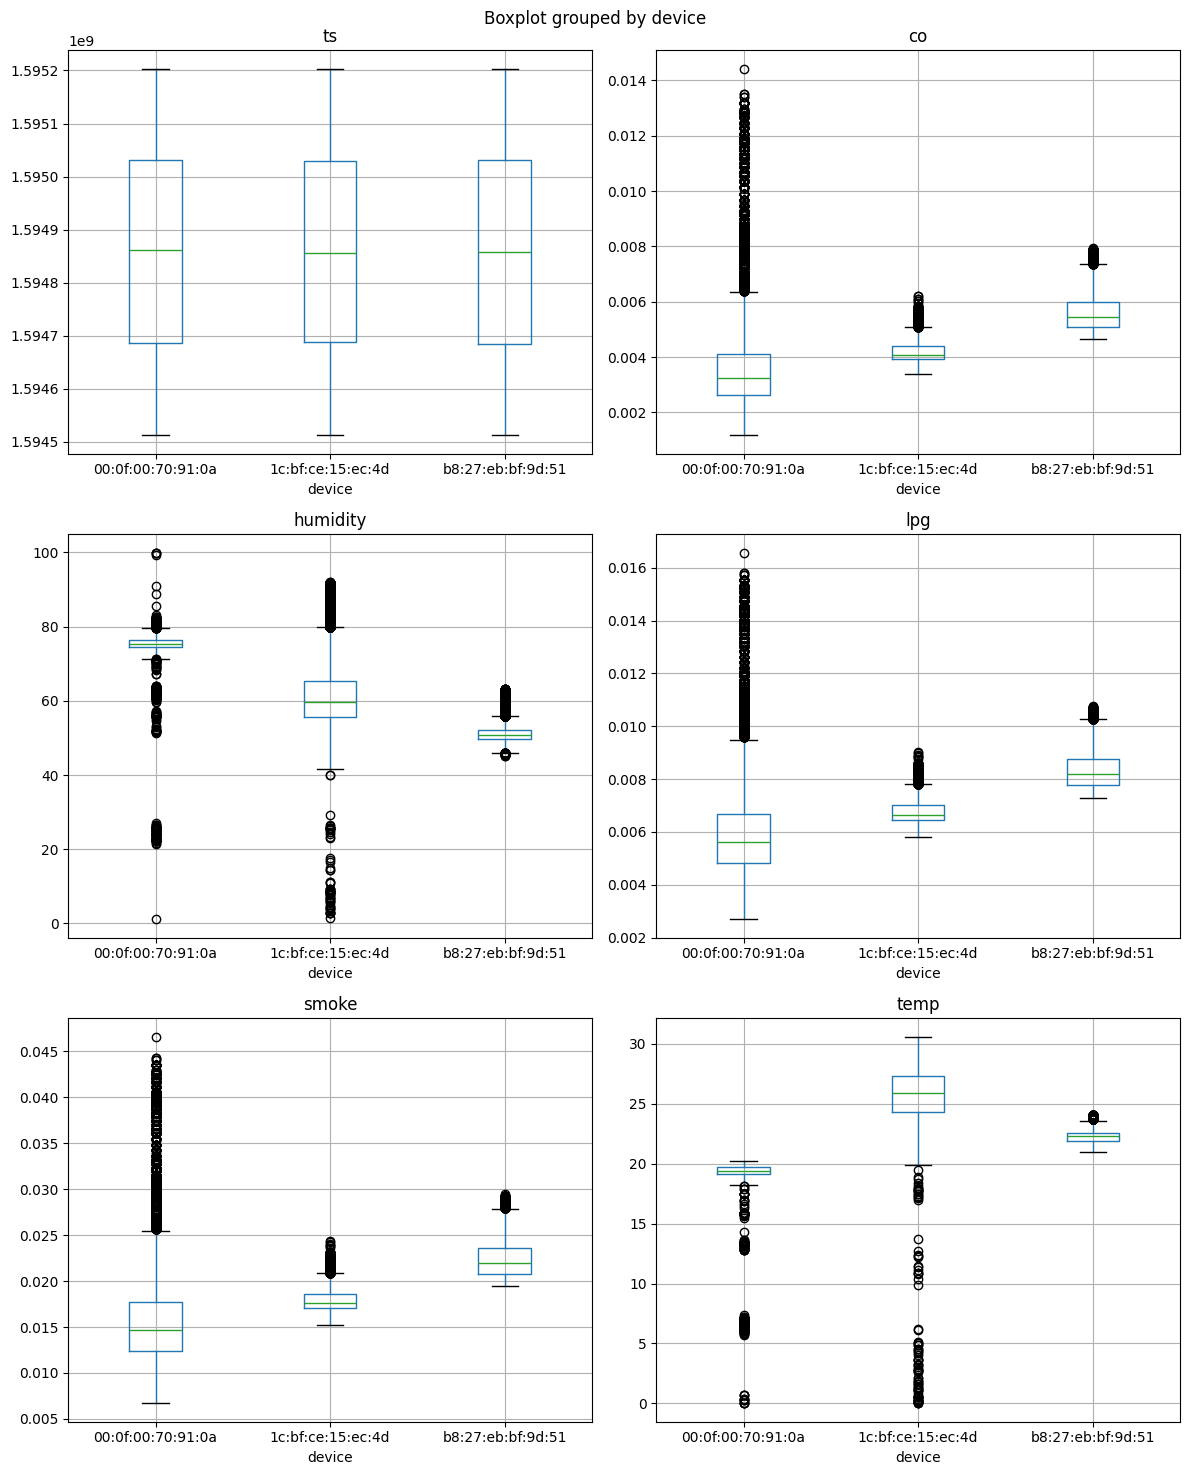

In [10]:
#box plot

cols =  2
rows = (len(numeric_cols) + cols - 1) // cols
fig,axes = plt.subplots(rows, cols, figsize=(12,5*rows))
axes = axes.flatten()

for i,col in enumerate(numeric_cols):
  df.boxplot(ax = axes[i], by="device", column=col)
  axes[i].set_title(f'{col}', fontsize=12)

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1569088016.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series = df.set_index('ts').resample('H')['temp'].mean()


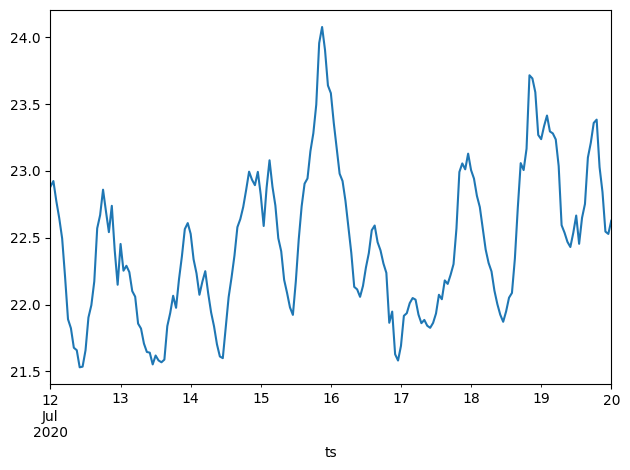

In [11]:
#time series line plot
df['ts'] = pd.to_datetime(df['ts'], unit = 's')
time_series = df.set_index('ts').resample('H')['temp'].mean()
time_series.plot()
plt.xlim(time_series.index.min(), time_series.index.max())  # full x range
plt.tight_layout()
plt.show()

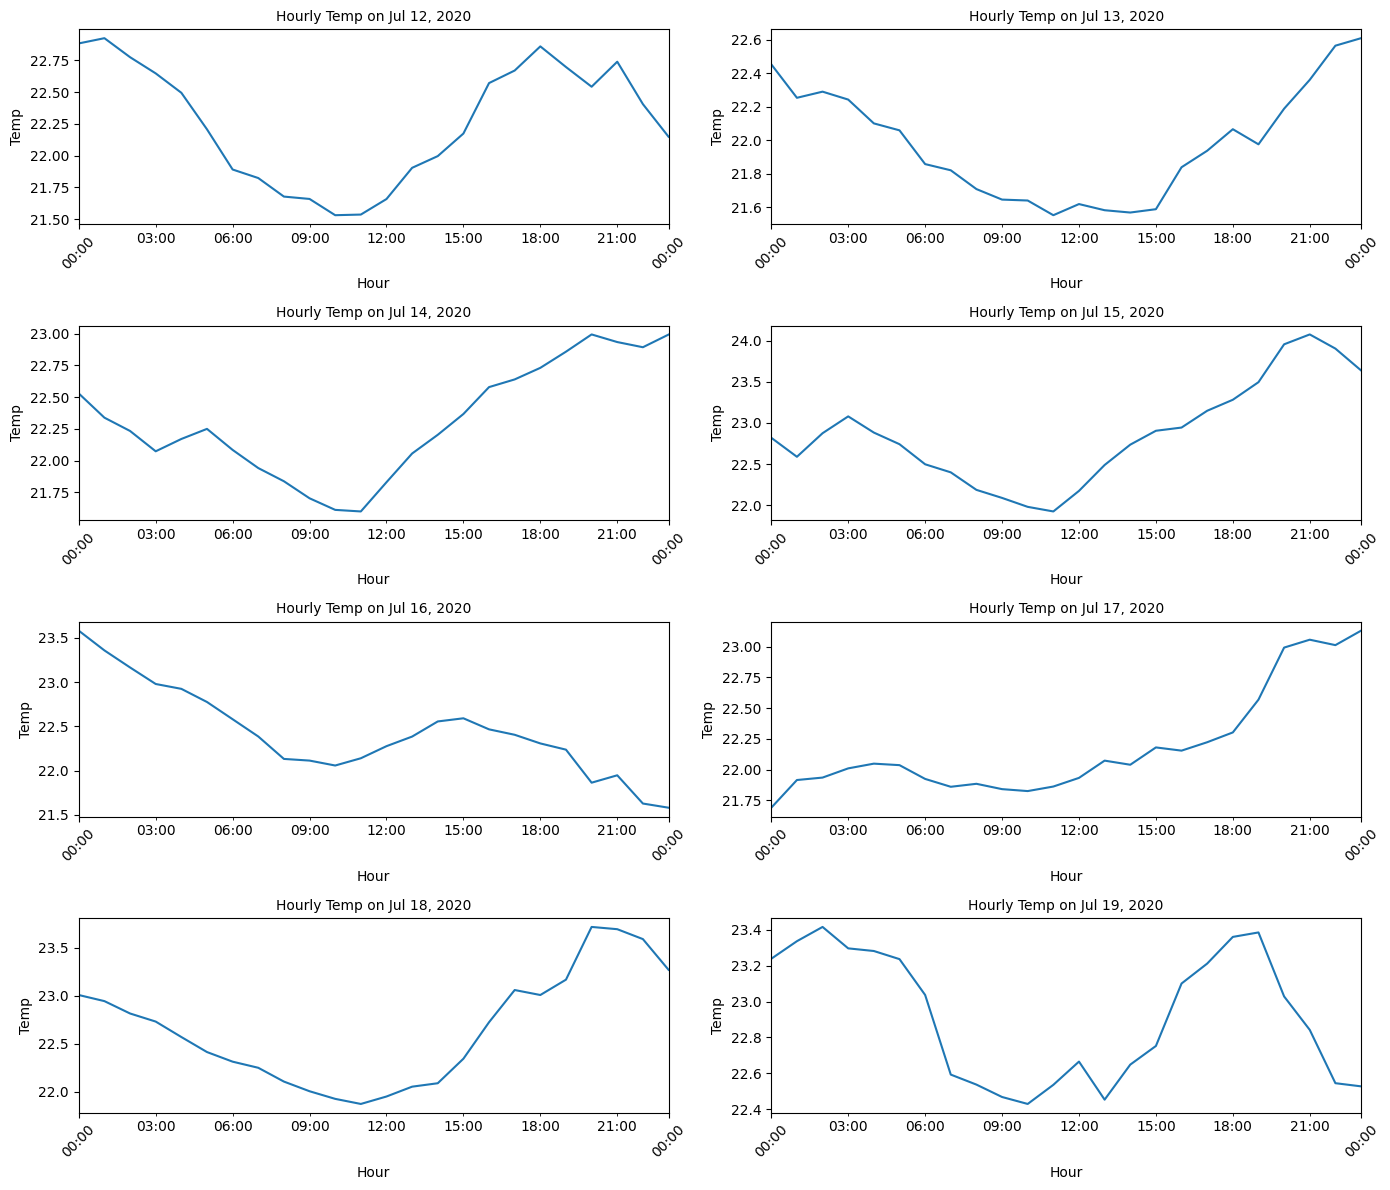

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Convert timestamp
df['ts'] = pd.to_datetime(df['ts'], unit='s')

# Create figure with 8 subplots (4 rows x 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Loop through 8 days (July 12–19)
for i in range(8):
    date = pd.Timestamp('2020-07-12') + pd.Timedelta(days=i)
    df_day = df[(df['ts'] >= date) & (df['ts'] < date + pd.Timedelta(days=1))]

    df_day.set_index('ts')['temp'].resample('h').mean().plot(ax=axes[i])

    axes[i].set_title(f'Hourly Temp on {date.strftime("%b %d, %Y")}', fontsize=10)
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Temp')
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

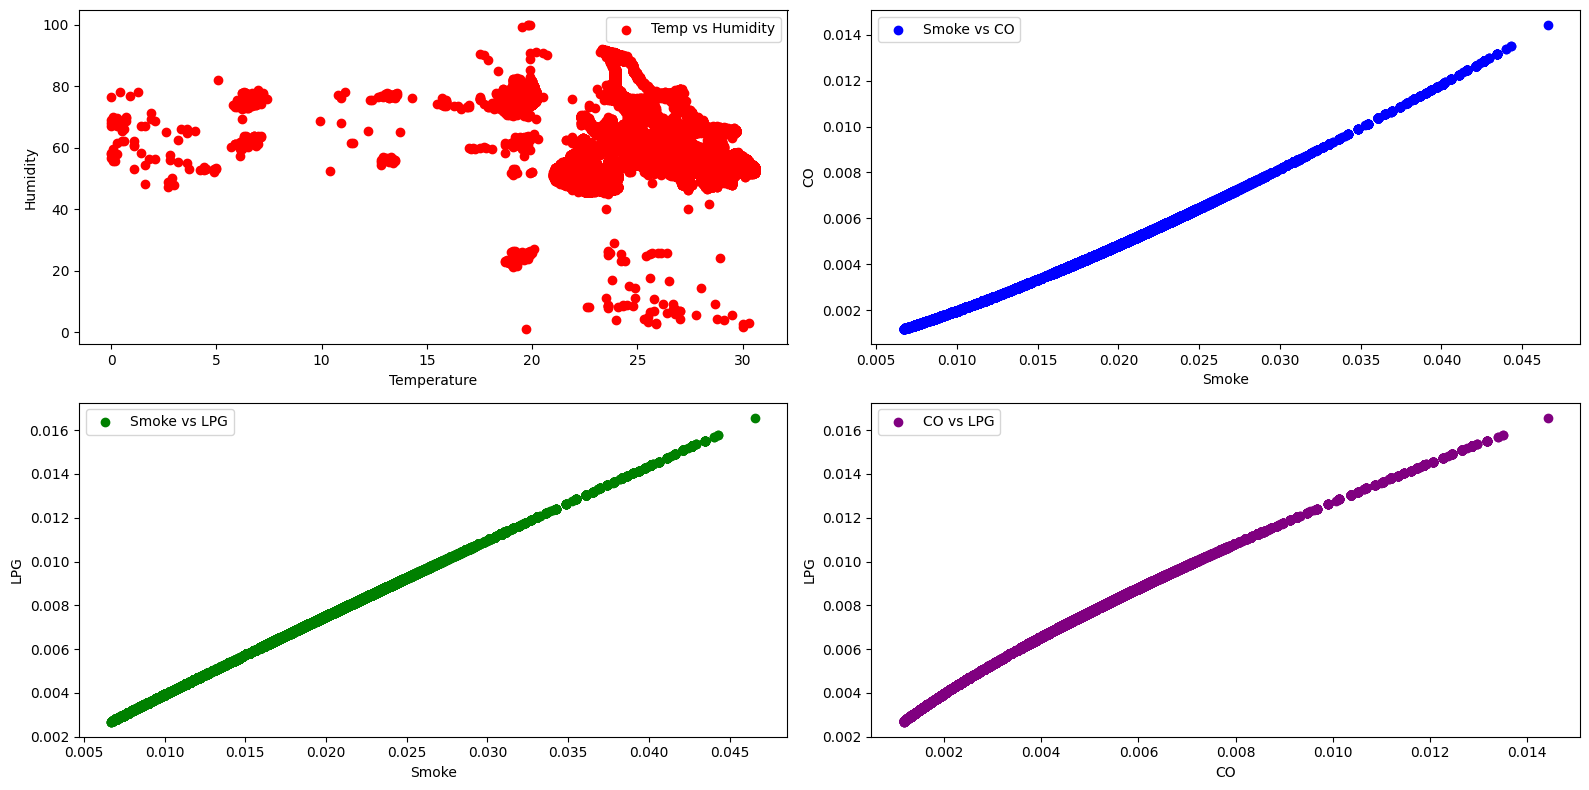

In [13]:
fig,axes = plt.subplots(2,2,figsize=(16,8))

axes[0][0].scatter(df['temp'], df['humidity'], color='red', label='Temp vs Humidity')
axes[0][0].set_xlabel("Temperature")
axes[0][0].set_ylabel("Humidity")
axes[0][0].legend()

axes[0][1].scatter(df['smoke'], df['co'], color='blue', label='Smoke vs CO')
axes[0][1].set_xlabel("Smoke")
axes[0][1].set_ylabel("CO")
axes[0][1].legend()

axes[1][0].scatter(df['smoke'], df['lpg'], color='green', label='Smoke vs LPG')
axes[1][0].set_xlabel("Smoke")
axes[1][0].set_ylabel("LPG")
axes[1][0].legend()

axes[1][1].scatter(df['co'], df['lpg'], color='purple', label='CO vs LPG')
axes[1][1].set_xlabel("CO")
axes[1][1].set_ylabel("LPG")
axes[1][1].legend()


plt.tight_layout()
plt.show()

<Axes: >

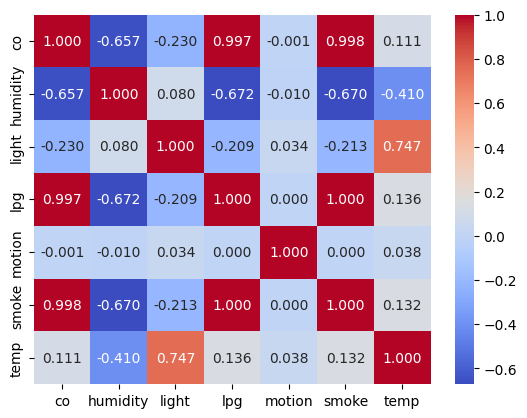

In [14]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f", cmap='coolwarm')

In [15]:
from sklearn.preprocessing import OneHotEncoder

#making a copy for usage
df_encoded = df.copy()
encoder = OneHotEncoder(sparse_output=False)
device_encoded = encoder.fit_transform(df_encoded[['device']])

#removing device column and adding encoded columns
encoded_cols = encoder.get_feature_names_out(['device'])
df_device_encoded = pd.DataFrame(device_encoded, columns=encoded_cols, index=df_encoded.index)

#binary encoding
df_encoded['motion'] = df_encoded['motion'].astype(int)
df_encoded['light'] = df_encoded['light'].astype(int)

#making new df with encoded features
df_encoded = pd.concat([df_encoded.drop(columns=['device']), df_device_encoded], axis=1)

In [16]:
print(df_encoded.head())

                             ts        co   humidity  light       lpg  motion  \
0 2020-07-12 00:01:34.385974646  0.004956  51.000000      0  0.007651       0   
1 2020-07-12 00:01:34.735567570  0.002840  76.000000      0  0.005114       0   
2 2020-07-12 00:01:38.073572874  0.004976  50.900000      0  0.007673       0   
3 2020-07-12 00:01:39.589145899  0.004403  76.800003      1  0.007023       0   
4 2020-07-12 00:01:41.761234999  0.004967  50.900000      0  0.007664       0   

      smoke       temp  device_00:0f:00:70:91:0a  device_1c:bf:ce:15:ec:4d  \
0  0.020411  22.700000                       0.0                       0.0   
1  0.013275  19.700001                       1.0                       0.0   
2  0.020475  22.600000                       0.0                       0.0   
3  0.018628  27.000000                       0.0                       1.0   
4  0.020448  22.600000                       0.0                       0.0   

   device_b8:27:eb:bf:9d:51  
0             

In [17]:
#checkpoint
df_encoded.to_csv("processed_data_checkpoint.csv", index=False)

In [18]:
import pandas as pd
df_encoded = pd.read_csv("processed_data_checkpoint.csv")

In [24]:
import datetime as date

df_encoded['ts'] = pd.to_datetime(df_encoded['ts'])

df_encoded['hour'] = df_encoded['ts'].dt.hour
df_encoded['dayofweek'] = df_encoded['ts'].dt.dayofweek
df_encoded['weekend'] = df_encoded['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df_encoded['aqi'] = df_encoded['co'] + df_encoded['lpg'] + df_encoded['smoke']
df_encoded['potential_fire'] = df_encoded['smoke'] * df_encoded['temp']
df_encoded['humidity_temp_diff'] = df_encoded['humidity'] - df_encoded['temp']

df_encoded.head()

,ts,co,humidity,light,lpg,motion,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,hour,dayofweek,weekend,aqi,potential_fire,humidity_temp_diff
0,2020-07-12 00:01:34.385974646,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,0.0,0.0,1.0,0,6,1,0.033018,0.463336,28.300000
1,2020-07-12 00:01:34.735567570,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,1.0,0.0,0.0,0,6,1,0.021229,0.261514,56.299999
2,2020-07-12 00:01:38.073572874,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,0.0,0.0,1.0,0,6,1,0.033124,0.462738,28.300000
3,2020-07-12 00:01:39.589145899,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,0.0,1.0,0.0,0,6,1,0.030055,0.502962,49.800003
4,2020-07-12 00:01:41.761234999,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,0.0,0.0,1.0,0,6,1,0.033079,0.462116,28.300000


In [26]:
#encoding timeseries
import numpy as np

# Encode hour
df_encoded['hour_sin'] = np.sin(2 * np.pi * df_encoded['hour'] / 24)
df_encoded['hour_cos'] = np.cos(2 * np.pi * df_encoded['hour'] / 24)

# Encode day of week
df_encoded['day_sin'] = np.sin(2 * np.pi * df_encoded['dayofweek'] / 7)
df_encoded['day_cos'] = np.cos(2 * np.pi * df_encoded['dayofweek'] / 7)

df_encoded.sample(n=5)

,ts,co,humidity,light,lpg,motion,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,...,hour,dayofweek,weekend,aqi,potential_fire,humidity_temp_diff,hour_sin,hour_cos,day_sin,day_cos
229271,2020-07-16 12:29:52.706480026,0.003919,55.299999,1,0.006456,0,0.017025,25.299999,0.0,1.0,...,12,3,0,0.027399,0.430726,30.000000,1.224647e-16,-1.000000,0.433884,-0.900969
144311,2020-07-14 20:40:21.178318501,0.003075,74.300003,0,0.005417,0,0.014117,19.100000,1.0,0.0,...,20,1,0,0.022609,0.269628,55.200003,-8.660254e-01,0.500000,0.781831,0.623490
54011,2020-07-13 01:40:16.546243668,0.005282,51.100000,0,0.008011,0,0.021440,22.000000,0.0,0.0,...,1,0,0,0.034733,0.471679,29.100000,2.588190e-01,0.965926,0.000000,1.000000
208996,2020-07-16 03:05:47.362921715,0.005409,47.800000,0,0.008150,0,0.021838,22.600000,0.0,0.0,...,3,3,0,0.035397,0.493543,25.200000,7.071068e-01,0.707107,0.433884,-0.900969
249023,2020-07-16 21:51:59.981661558,0.002414,74.699997,0,0.004547,0,0.011708,19.900000,1.0,0.0,...,21,3,0,0.018669,0.232988,54.799997,-7.071068e-01,0.707107,0.433884,-0.900969


In [27]:
df_encoded = df_encoded.drop(columns=['hour', 'dayofweek'])
df_encoded.head()

,ts,co,humidity,light,lpg,motion,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,weekend,aqi,potential_fire,humidity_temp_diff,hour_sin,hour_cos,day_sin,day_cos
0,2020-07-12 00:01:34.385974646,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,0.0,0.0,1.0,1,0.033018,0.463336,28.300000,0.0,1.0,-0.781831,0.62349
1,2020-07-12 00:01:34.735567570,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,1.0,0.0,0.0,1,0.021229,0.261514,56.299999,0.0,1.0,-0.781831,0.62349
2,2020-07-12 00:01:38.073572874,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,0.0,0.0,1.0,1,0.033124,0.462738,28.300000,0.0,1.0,-0.781831,0.62349
3,2020-07-12 00:01:39.589145899,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,0.0,1.0,0.0,1,0.030055,0.502962,49.800003,0.0,1.0,-0.781831,0.62349
4,2020-07-12 00:01:41.761234999,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,0.0,0.0,1.0,1,0.033079,0.462116,28.300000,0.0,1.0,-0.781831,0.62349


In [30]:
print(df_encoded.describe())


                                  ts             co       humidity  \
count                         405184  405184.000000  405184.000000   
mean   2020-07-16 00:06:57.296823808       0.004639      60.511694   
min    2020-07-12 00:01:34.385974646       0.001171       1.100000   
25%    2020-07-14 00:20:00.308378368       0.003919      51.000000   
50%    2020-07-16 00:06:28.903096320       0.004812      54.900000   
75%    2020-07-18 00:02:56.671219968       0.005409      74.300003   
max    2020-07-20 00:03:37.264312506       0.014420      99.900002   
std                              NaN       0.001250      11.366489   

               light            lpg        motion          smoke  \
count  405184.000000  405184.000000  405184.00000  405184.000000   
mean        0.277718       0.007237       0.00119       0.019264   
min         0.000000       0.002693       0.00000       0.006692   
25%         0.000000       0.006456       0.00000       0.017024   
50%         0.000000       0.

In [34]:
#normalization
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df_encoded_norm = df_encoded.copy()
scaler = StandardScaler()
cols_to_scale = ['co', 'humidity', 'lpg', 'smoke', 'temp', 'aqi', 'potential_fire', 'humidity_temp_diff']

df_encoded_norm[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
df_encoded_norm.head()

,ts,co,humidity,light,lpg,motion,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,weekend,aqi,potential_fire,humidity_temp_diff,hour_sin,hour_cos,day_sin,day_cos
0,2020-07-12 00:01:34.385974646,0.253670,-0.836820,0,0.286471,0,0.280867,0.091172,0.0,0.0,1.0,1,0.277134,0.285026,-0.767458,0.0,1.0,-0.781831,0.62349
1,2020-07-12 00:01:34.735567570,-1.438976,1.362631,0,-1.469927,0,-1.465637,-1.020621,1.0,0.0,0.0,1,-1.462098,-1.675803,1.434783,0.0,1.0,-0.781831,0.62349
2,2020-07-12 00:01:38.073572874,0.269729,-0.845618,0,0.301986,0,0.296495,0.054112,0.0,0.0,1.0,1,0.292822,0.279216,-0.767458,0.0,1.0,-0.781831,0.62349
3,2020-07-12 00:01:39.589145899,-0.188651,1.433013,1,-0.148041,0,-0.155499,1.684742,0.0,1.0,0.0,1,-0.160073,0.670021,0.923549,0.0,1.0,-0.781831,0.62349
4,2020-07-12 00:01:41.761234999,0.262810,-0.845618,0,0.295303,0,0.289763,0.054112,0.0,0.0,1.0,1,0.286065,0.273176,-0.767458,0.0,1.0,-0.781831,0.62349
